In [ ]:
!pip install neuralprophet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 145.8/145.8 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 815.2/815.2 kB 22.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 866.2/866.2 kB 21.2 MB/s eta 0:00:00


In [ ]:
from neuralprophet import NeuralProphet

ERROR:NP.plotly:Importing plotly failed. Interactive plots will not work.
ERROR:NP.plotly:Importing plotly failed. Interactive plots will not work.


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.cluster import KMeans
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import os

In [ ]:
# Mount Google Drive
drive.mount('/content/drive')

# Path of folder
folder_path = '/content/drive/MyDrive/Colab Notebooks/2024_08_21/'

# Get list of all CSV files in the folder
csv_files = [os.path.join(folder_path, file) for file in os.listdir(folder_path) if file.endswith('.csv')]

# Initialize an empty list to hold the dataframes
dfs = []

# Loop through the CSV files and read each one into a dataframe
for file in csv_files:
    df = pd.read_csv(file)
    dfs.append(df)

# Concatenate all dataframes into a single dataframe
data = pd.concat(dfs, ignore_index=True)

Mounted at /content/drive


In [ ]:
data_selected = data[['Alarm Name', 'Alarm Location Info', 'First Occurred On', 'Site ID', 'Vendor', 'Domain', 'Device Type']]
data_selected.head(10)

,Alarm Name,Alarm Location Info,First Occurred On,Site ID,Vendor,Domain,Device Type
0,Rectifier Failure Alarm,"Cabinet No.=0, Subrack No.=0, Slot No.=19, Por...",2024-08-21 15:47:29,AM0247,HUAWEI,Power,NaN
1,S1 Interface Fault,"eNodeB Function Name=Mahabage-GM0032-L, S1 Int...",2024-08-21 15:47:05,GM0032,HUAWEI,Access,eNodeB
2,S1 Interface Fault,"eNodeB Function Name=Mahabage-GM0032-L, S1 Int...",2024-08-21 15:47:05,GM0032,HUAWEI,Access,eNodeB
3,S1 Interface Fault,"eNodeB Function Name=Mahabage-GM0032-L, S1 Int...",2024-08-21 15:47:05,GM0032,HUAWEI,Access,eNodeB
4,Mains Failure Alarm,"Cabinet No.=0, Subrack No.=0, Slot No.=19, Por...",2024-08-21 15:46:33,TR0076,HUAWEI,Power,GBTS
5,S1ap Link Down,"Mobile Country Code=413, Mobile Network Code=0...",2024-08-21 15:45:59,NaN,HUAWEI,Others,NaN
6,Theft Alarm,"Cabinet No.=0, Subrack No.=0, Slot No.=19, Por...",2024-08-21 15:45:50,PU0146,HUAWEI,Power,eGBTS
7,Mains Failure Alarm,"Cabinet No.=0, Subrack No.=0, Slot No.=19, Por...",2024-08-21 15:45:32,MU0025,HUAWEI,Power,eGBTS
8,Burglar Alarm,"Cabinet No.=0, Subrack No.=7, Slot No.=0, Boar...",2024-08-21 15:45:29,JA0018,HUAWEI,Power,NaN
9,IPPM session fault,"Local IP address=172.27.24.251, VPN=VPN_S1, Pe...",2024-08-21 15:45:23,VV0000,HUAWEI,Core,Unknown


In [ ]:
# prompt: get only alarms for site id PU0146

PU0146_alarms = data_selected[data_selected['Site ID'] == 'PU0009']
PU0146_alarms.head(10)


,Alarm Name,Alarm Location Info,First Occurred On,Site ID,Vendor,Domain,Device Type
1279,RF Unit TX Channel Gain Out of Range,"Cabinet No.=0, Subrack No.=131, Slot No.=0, TX...",2024-08-21 14:40:10,PU0009,HUAWEI,Access,GBTS
25249,RF Unit TX Channel Gain Out of Range,"Cabinet No.=0, Subrack No.=131, Slot No.=0, TX...",2024-08-20 18:01:33,PU0009,HUAWEI,Access,GBTS
26418,Cell Unavailable,"eNodeB Function Name=Marawila-PU0009-L, Local ...",2024-08-20 17:13:43,PU0009,HUAWEI,Access,eNodeB
26419,Cell Unavailable,"eNodeB Function Name=Marawila-PU0009-L, Local ...",2024-08-20 17:13:43,PU0009,HUAWEI,Access,eNodeB
26421,RF Unit Maintenance Link Failure,"Cabinet No.=0, Subrack No.=61, Slot No.=0, Boa...",2024-08-20 17:12:23,PU0009,HUAWEI,Access,eNodeB
26423,RF Unit Maintenance Link Failure,"Cabinet No.=0, Subrack No.=61, Slot No.=0, Boa...",2024-08-20 17:13:39,PU0009,HUAWEI,Access,eNodeB
26468,Cell Unavailable,"eNodeB Function Name=Marawila-PU0009-L, Local ...",2024-08-20 17:12:25,PU0009,HUAWEI,Access,eNodeB
26469,Cell Unavailable,"eNodeB Function Name=Marawila-PU0009-L, Local ...",2024-08-20 17:12:25,PU0009,HUAWEI,Access,eNodeB
31496,Cell Unavailable,"eNodeB Function Name=Marawila-PU0009-L, Local ...",2024-08-20 14:13:58,PU0009,HUAWEI,Access,eNodeB
31511,Cell Unavailable,"eNodeB Function Name=Marawila-PU0009-L, Local ...",2024-08-20 14:13:49,PU0009,HUAWEI,Access,eNodeB


In [ ]:
# prompt: encode the Alarm name column  and rename that column as y

le = LabelEncoder()
PU0146_alarms['y'] = le.fit_transform(PU0146_alarms['Alarm Name'])
PU0146_alarms = PU0146_alarms.drop('Alarm Name', axis=1)
PU0146_alarms.head(10)


WARNING - (py.warnings._showwarnmsg) - <ipython-input-7-d030e3972aa3>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PU0146_alarms['y'] = le.fit_transform(PU0146_alarms['Alarm Name'])

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PU0146_alarms['y'] = le.fit_transform(PU0146_alarms['Alarm Name'])



,Alarm Location Info,First Occurred On,Site ID,Vendor,Domain,Device Type,y
1279,"Cabinet No.=0, Subrack No.=131, Slot No.=0, TX...",2024-08-21 14:40:10,PU0009,HUAWEI,Access,GBTS,13
25249,"Cabinet No.=0, Subrack No.=131, Slot No.=0, TX...",2024-08-20 18:01:33,PU0009,HUAWEI,Access,GBTS,13
26418,"eNodeB Function Name=Marawila-PU0009-L, Local ...",2024-08-20 17:13:43,PU0009,HUAWEI,Access,eNodeB,1
26419,"eNodeB Function Name=Marawila-PU0009-L, Local ...",2024-08-20 17:13:43,PU0009,HUAWEI,Access,eNodeB,1
26421,"Cabinet No.=0, Subrack No.=61, Slot No.=0, Boa...",2024-08-20 17:12:23,PU0009,HUAWEI,Access,eNodeB,12
26423,"Cabinet No.=0, Subrack No.=61, Slot No.=0, Boa...",2024-08-20 17:13:39,PU0009,HUAWEI,Access,eNodeB,12
26468,"eNodeB Function Name=Marawila-PU0009-L, Local ...",2024-08-20 17:12:25,PU0009,HUAWEI,Access,eNodeB,1
26469,"eNodeB Function Name=Marawila-PU0009-L, Local ...",2024-08-20 17:12:25,PU0009,HUAWEI,Access,eNodeB,1
31496,"eNodeB Function Name=Marawila-PU0009-L, Local ...",2024-08-20 14:13:58,PU0009,HUAWEI,Access,eNodeB,1
31511,"eNodeB Function Name=Marawila-PU0009-L, Local ...",2024-08-20 14:13:49,PU0009,HUAWEI,Access,eNodeB,1


In [ ]:
# prompt: give mapping of encoded value to alarm name  print line by line

for i, alarm_name in enumerate(le.classes_):
  print(f'{i}: {alarm_name}')


0: Cell Out of Service
1: Cell Unavailable
2: Data Configuration Exceeding Licensed Limit
3: Fuse Failure Alarm
4: GSM Local Cell Unusable
5: Generator On Load Alarm
6: IP PM Activation Failure
7: IP Path Fault
8: Licensed Feature Unusable
9: Mains Failure Alarm
10: NE Is Disconnected
11: RF Unit External Power Supply Insufficient
12: RF Unit Maintenance Link Failure
13: RF Unit TX Channel Gain Out of Range
14: RF Unit VSWR Threshold Crossed
15: Remote Maintenance Link Failure
16: S1 Interface Fault
17: SCTP Link Congestion
18: SCTP Link Fault
19: User Plane Path Fault


In [ ]:
# prompt: rename first occured column as ds

PU0146_alarms = PU0146_alarms.rename(columns={'First Occurred On': 'ds'})
PU0146_alarms.head(10)


,Alarm Location Info,ds,Site ID,Vendor,Domain,Device Type,y
1279,"Cabinet No.=0, Subrack No.=131, Slot No.=0, TX...",2024-08-21 14:40:10,PU0009,HUAWEI,Access,GBTS,13
25249,"Cabinet No.=0, Subrack No.=131, Slot No.=0, TX...",2024-08-20 18:01:33,PU0009,HUAWEI,Access,GBTS,13
26418,"eNodeB Function Name=Marawila-PU0009-L, Local ...",2024-08-20 17:13:43,PU0009,HUAWEI,Access,eNodeB,1
26419,"eNodeB Function Name=Marawila-PU0009-L, Local ...",2024-08-20 17:13:43,PU0009,HUAWEI,Access,eNodeB,1
26421,"Cabinet No.=0, Subrack No.=61, Slot No.=0, Boa...",2024-08-20 17:12:23,PU0009,HUAWEI,Access,eNodeB,12
26423,"Cabinet No.=0, Subrack No.=61, Slot No.=0, Boa...",2024-08-20 17:13:39,PU0009,HUAWEI,Access,eNodeB,12
26468,"eNodeB Function Name=Marawila-PU0009-L, Local ...",2024-08-20 17:12:25,PU0009,HUAWEI,Access,eNodeB,1
26469,"eNodeB Function Name=Marawila-PU0009-L, Local ...",2024-08-20 17:12:25,PU0009,HUAWEI,Access,eNodeB,1
31496,"eNodeB Function Name=Marawila-PU0009-L, Local ...",2024-08-20 14:13:58,PU0009,HUAWEI,Access,eNodeB,1
31511,"eNodeB Function Name=Marawila-PU0009-L, Local ...",2024-08-20 14:13:49,PU0009,HUAWEI,Access,eNodeB,1


In [ ]:
# prompt: sort accoding to ds column latest alarms

PU0146_alarms['ds'] = pd.to_datetime(PU0146_alarms['ds'])
PU0146_alarms = PU0146_alarms.sort_values(by='ds', ascending=False)
PU0146_alarms.head(10)according


,Alarm Location Info,ds,Site ID,Vendor,Domain,Device Type,y
1279,"Cabinet No.=0, Subrack No.=131, Slot No.=0, TX...",2024-08-21 14:40:10,PU0009,HUAWEI,Access,GBTS,13
25249,"Cabinet No.=0, Subrack No.=131, Slot No.=0, TX...",2024-08-20 18:01:33,PU0009,HUAWEI,Access,GBTS,13
26418,"eNodeB Function Name=Marawila-PU0009-L, Local ...",2024-08-20 17:13:43,PU0009,HUAWEI,Access,eNodeB,1
26419,"eNodeB Function Name=Marawila-PU0009-L, Local ...",2024-08-20 17:13:43,PU0009,HUAWEI,Access,eNodeB,1
26423,"Cabinet No.=0, Subrack No.=61, Slot No.=0, Boa...",2024-08-20 17:13:39,PU0009,HUAWEI,Access,eNodeB,12
26468,"eNodeB Function Name=Marawila-PU0009-L, Local ...",2024-08-20 17:12:25,PU0009,HUAWEI,Access,eNodeB,1
26469,"eNodeB Function Name=Marawila-PU0009-L, Local ...",2024-08-20 17:12:25,PU0009,HUAWEI,Access,eNodeB,1
26421,"Cabinet No.=0, Subrack No.=61, Slot No.=0, Boa...",2024-08-20 17:12:23,PU0009,HUAWEI,Access,eNodeB,12
31496,"eNodeB Function Name=Marawila-PU0009-L, Local ...",2024-08-20 14:13:58,PU0009,HUAWEI,Access,eNodeB,1
31511,"eNodeB Function Name=Marawila-PU0009-L, Local ...",2024-08-20 14:13:49,PU0009,HUAWEI,Access,eNodeB,1


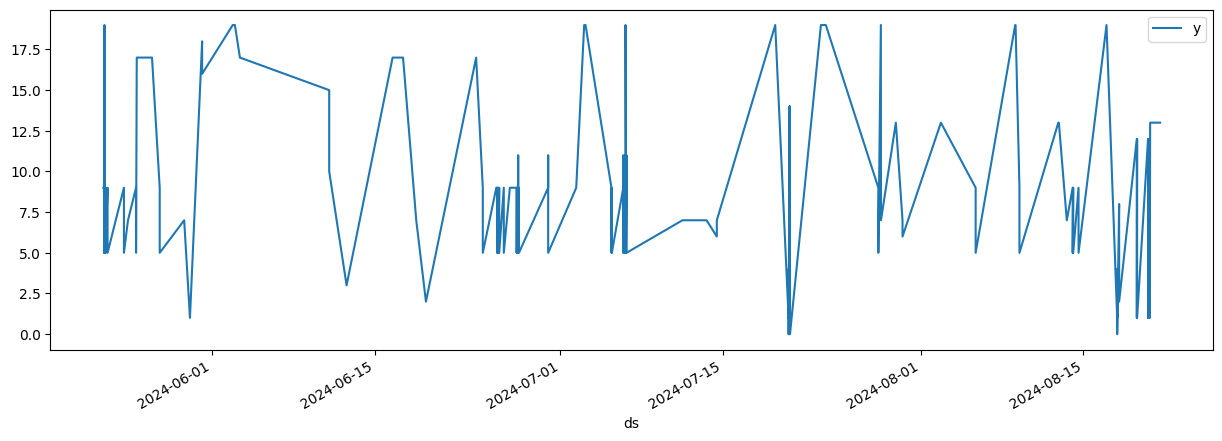

In [ ]:
import pandas as pd

# Load the dataset from the CSV file using pandas
# df = pd.read_csv("https://github.com/ourownstory/neuralprophet-data/raw/main/kaggle-energy/datasets/tutorial01.csv")
# Plot the dataset, showing price (y column) over time (ds column)
plt = PU0146_alarms.plot(x="ds", y="y", figsize=(15, 5))

In [ ]:
PU0146_alarms.head(10)

,Alarm Location Info,ds,Site ID,Vendor,Domain,Device Type,y
1279,"Cabinet No.=0, Subrack No.=131, Slot No.=0, TX...",2024-08-21 14:40:10,PU0009,HUAWEI,Access,GBTS,13
25249,"Cabinet No.=0, Subrack No.=131, Slot No.=0, TX...",2024-08-20 18:01:33,PU0009,HUAWEI,Access,GBTS,13
26418,"eNodeB Function Name=Marawila-PU0009-L, Local ...",2024-08-20 17:13:43,PU0009,HUAWEI,Access,eNodeB,1
26419,"eNodeB Function Name=Marawila-PU0009-L, Local ...",2024-08-20 17:13:43,PU0009,HUAWEI,Access,eNodeB,1
26423,"Cabinet No.=0, Subrack No.=61, Slot No.=0, Boa...",2024-08-20 17:13:39,PU0009,HUAWEI,Access,eNodeB,12
26468,"eNodeB Function Name=Marawila-PU0009-L, Local ...",2024-08-20 17:12:25,PU0009,HUAWEI,Access,eNodeB,1
26469,"eNodeB Function Name=Marawila-PU0009-L, Local ...",2024-08-20 17:12:25,PU0009,HUAWEI,Access,eNodeB,1
26421,"Cabinet No.=0, Subrack No.=61, Slot No.=0, Boa...",2024-08-20 17:12:23,PU0009,HUAWEI,Access,eNodeB,12
31496,"eNodeB Function Name=Marawila-PU0009-L, Local ...",2024-08-20 14:13:58,PU0009,HUAWEI,Access,eNodeB,1
31511,"eNodeB Function Name=Marawila-PU0009-L, Local ...",2024-08-20 14:13:49,PU0009,HUAWEI,Access,eNodeB,1


In [ ]:
# prompt: drop rows with y is unknown

PU0146_alarms = PU0146_alarms[PU0146_alarms['y'] != 'Unknown']


In [ ]:
# prompt: remove duplicates in ds

PU0146_alarms = PU0146_alarms.drop_duplicates(subset=['ds'])
PU0146_alarms.head(10)


,Alarm Location Info,ds,Site ID,Vendor,Domain,Device Type,y
1279,"Cabinet No.=0, Subrack No.=131, Slot No.=0, TX...",2024-08-21 14:40:10,PU0009,HUAWEI,Access,GBTS,13
25249,"Cabinet No.=0, Subrack No.=131, Slot No.=0, TX...",2024-08-20 18:01:33,PU0009,HUAWEI,Access,GBTS,13
26418,"eNodeB Function Name=Marawila-PU0009-L, Local ...",2024-08-20 17:13:43,PU0009,HUAWEI,Access,eNodeB,1
26423,"Cabinet No.=0, Subrack No.=61, Slot No.=0, Boa...",2024-08-20 17:13:39,PU0009,HUAWEI,Access,eNodeB,12
26468,"eNodeB Function Name=Marawila-PU0009-L, Local ...",2024-08-20 17:12:25,PU0009,HUAWEI,Access,eNodeB,1
26421,"Cabinet No.=0, Subrack No.=61, Slot No.=0, Boa...",2024-08-20 17:12:23,PU0009,HUAWEI,Access,eNodeB,12
31496,"eNodeB Function Name=Marawila-PU0009-L, Local ...",2024-08-20 14:13:58,PU0009,HUAWEI,Access,eNodeB,1
31511,"eNodeB Function Name=Marawila-PU0009-L, Local ...",2024-08-20 14:13:49,PU0009,HUAWEI,Access,eNodeB,1
31513,"Cabinet No.=0, Subrack No.=61, Slot No.=0, Boa...",2024-08-20 14:13:46,PU0009,HUAWEI,Access,eNodeB,12
31525,"eNodeB Function Name=Marawila-PU0009-L, Local ...",2024-08-20 14:12:25,PU0009,HUAWEI,Access,eNodeB,1


In [ ]:
# prompt: keep only ds and y columns

PU0146_alarms = PU0146_alarms[['ds', 'y']]
PU0146_alarms.head(10)


,ds,y
1279,2024-08-21 14:40:10,13
25249,2024-08-20 18:01:33,13
26418,2024-08-20 17:13:43,1
26423,2024-08-20 17:13:39,12
26468,2024-08-20 17:12:25,1
26421,2024-08-20 17:12:23,12
31496,2024-08-20 14:13:58,1
31511,2024-08-20 14:13:49,1
31513,2024-08-20 14:13:46,12
31525,2024-08-20 14:12:25,1


In [ ]:


# Import the NeuralProphet class
from neuralprophet import NeuralProphet, set_log_level

# Disable logging messages unless there is an error
set_log_level("ERROR")

PU0146_alarms['ds'] = pd.to_datetime(PU0146_alarms['ds'])  # Ensure 'ds' is datetime
PU0146_alarms = PU0146_alarms.set_index('ds').resample('H').mean().reset_index()

# Create a NeuralProphet model with default parameters
m = NeuralProphet()
# Use static plotly in notebooks
m.set_plotting_backend("plotly-static")

# Fit the model on the dataset (this might take a bit)
metrics = m.fit(PU0146_alarms)

Training: |          | 0/? [00:00<?, ?it/s]

Finding best initial lr:   0%|          | 0/206 [00:00<?, ?it/s]

WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.10/dist-packages/pytorch_lightning/utilities/data.py:78: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 8. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.


WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.10/dist-packages/pytorch_lightning/utilities/data.py:78: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 1. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.




Training: |          | 0/? [00:00<?, ?it/s]

WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.10/dist-packages/neuralprophet/data/split.py:273: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, future_df])

  df = pd.concat([df, future_df])



Predicting: |          | 0/? [00:00<?, ?it/s]

WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.10/dist-packages/neuralprophet/plot_forecast_plotly.py:100: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ds = fcst["ds"].dt.to_pydatetime()

  ds = fcst["ds"].dt.to_pydatetime()



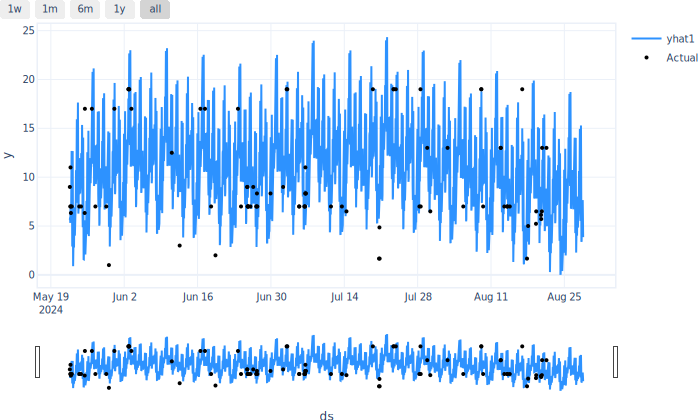

In [ ]:
# Create a new dataframe reaching 24*7 into the future for our forecast, n_historic_predictions also shows historic data
df_future = m.make_future_dataframe(PU0146_alarms, n_historic_predictions=True, periods=24*7)

# Predict the future
forecast = m.predict(df_future)

# Visualize the forecast
m.plot(forecast)

WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.10/dist-packages/neuralprophet/data/split.py:273: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.




Predicting: |          | 0/? [00:00<?, ?it/s]

WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.10/dist-packages/neuralprophet/plot_forecast_plotly.py:100: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result




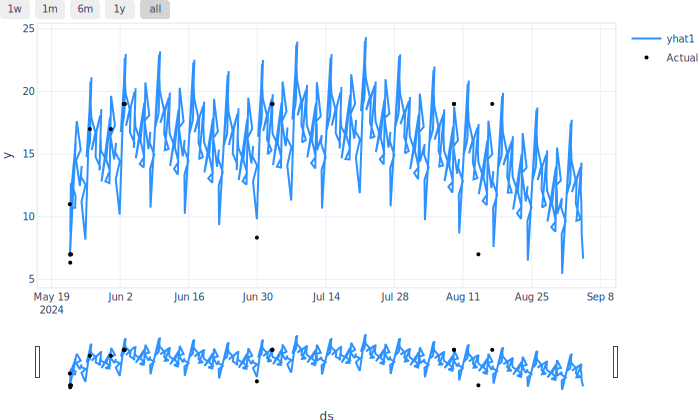

In [ ]:
# Create a new dataframe reaching 365 into the future for our forecast, n_historic_predictions also shows historic data
df_future = m.make_future_dataframe(PU0146_alarms, n_historic_predictions=True, periods=24*14)

# Predict the future
forecast = m.predict(df_future)

# Limit to 2 or 3 alarms per day
forecast['date'] = forecast['ds'].dt.date  # Extract the date from the datetime
daily_predictions = forecast.groupby('date').apply(lambda x: x.nlargest(5, 'yhat1')).reset_index(drop=True)

# Visualize the forecast
m.plot(daily_predictions)

WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.10/dist-packages/neuralprophet/data/split.py:273: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.




Predicting: |          | 0/? [00:00<?, ?it/s]

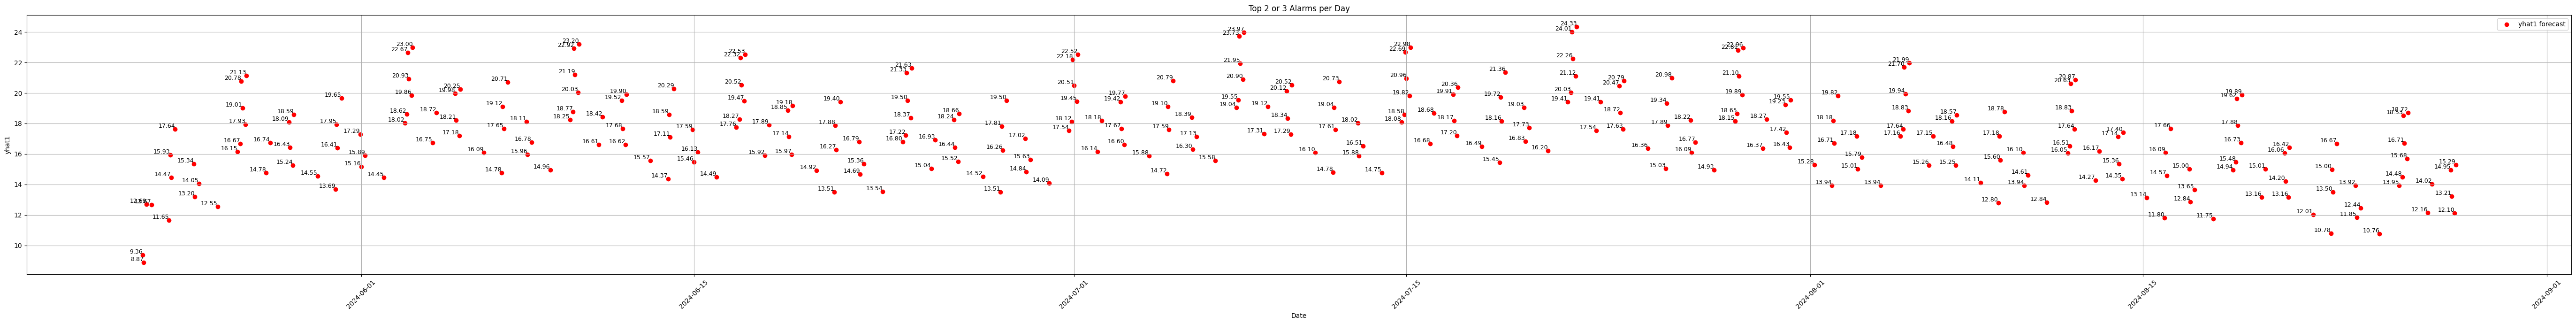

In [ ]:
# Import the necessary library
import matplotlib.pyplot as plt

# Create a new dataframe reaching 7 days into the future for our forecast
df_future = m.make_future_dataframe(PU0146_alarms, n_historic_predictions=True, periods=24*7)

# Predict the future
forecast = m.predict(df_future)

# Limit to 2 or 3 alarms per day
forecast['date'] = forecast['ds'].dt.date  # Extract the date from the datetime
daily_predictions = forecast.groupby('date').apply(lambda x: x.nlargest(3, 'yhat1')).reset_index(drop=True)

# Plot 'yhat1' as dots on top of the existing plot
plt.figure(figsize=(55, 7))  # Create a new figure with adjusted size
plt.scatter(daily_predictions['ds'], daily_predictions['yhat1'], color='red', label='yhat1 forecast')

# Add labels to data points
for i, row in daily_predictions.iterrows():
    plt.text(row['ds'], row['yhat1'], f'{row["yhat1"]:.2f}', fontsize=9, ha='right', va='bottom')

plt.xlabel('Date')
plt.ylabel('yhat1')
plt.title('Top 2 or 3 Alarms per Day')
plt.legend()
plt.grid(True)  # Add grid lines for better readability
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()  # Display the plot


WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.10/dist-packages/neuralprophet/data/split.py:273: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.




Predicting: |          | 0/? [00:00<?, ?it/s]

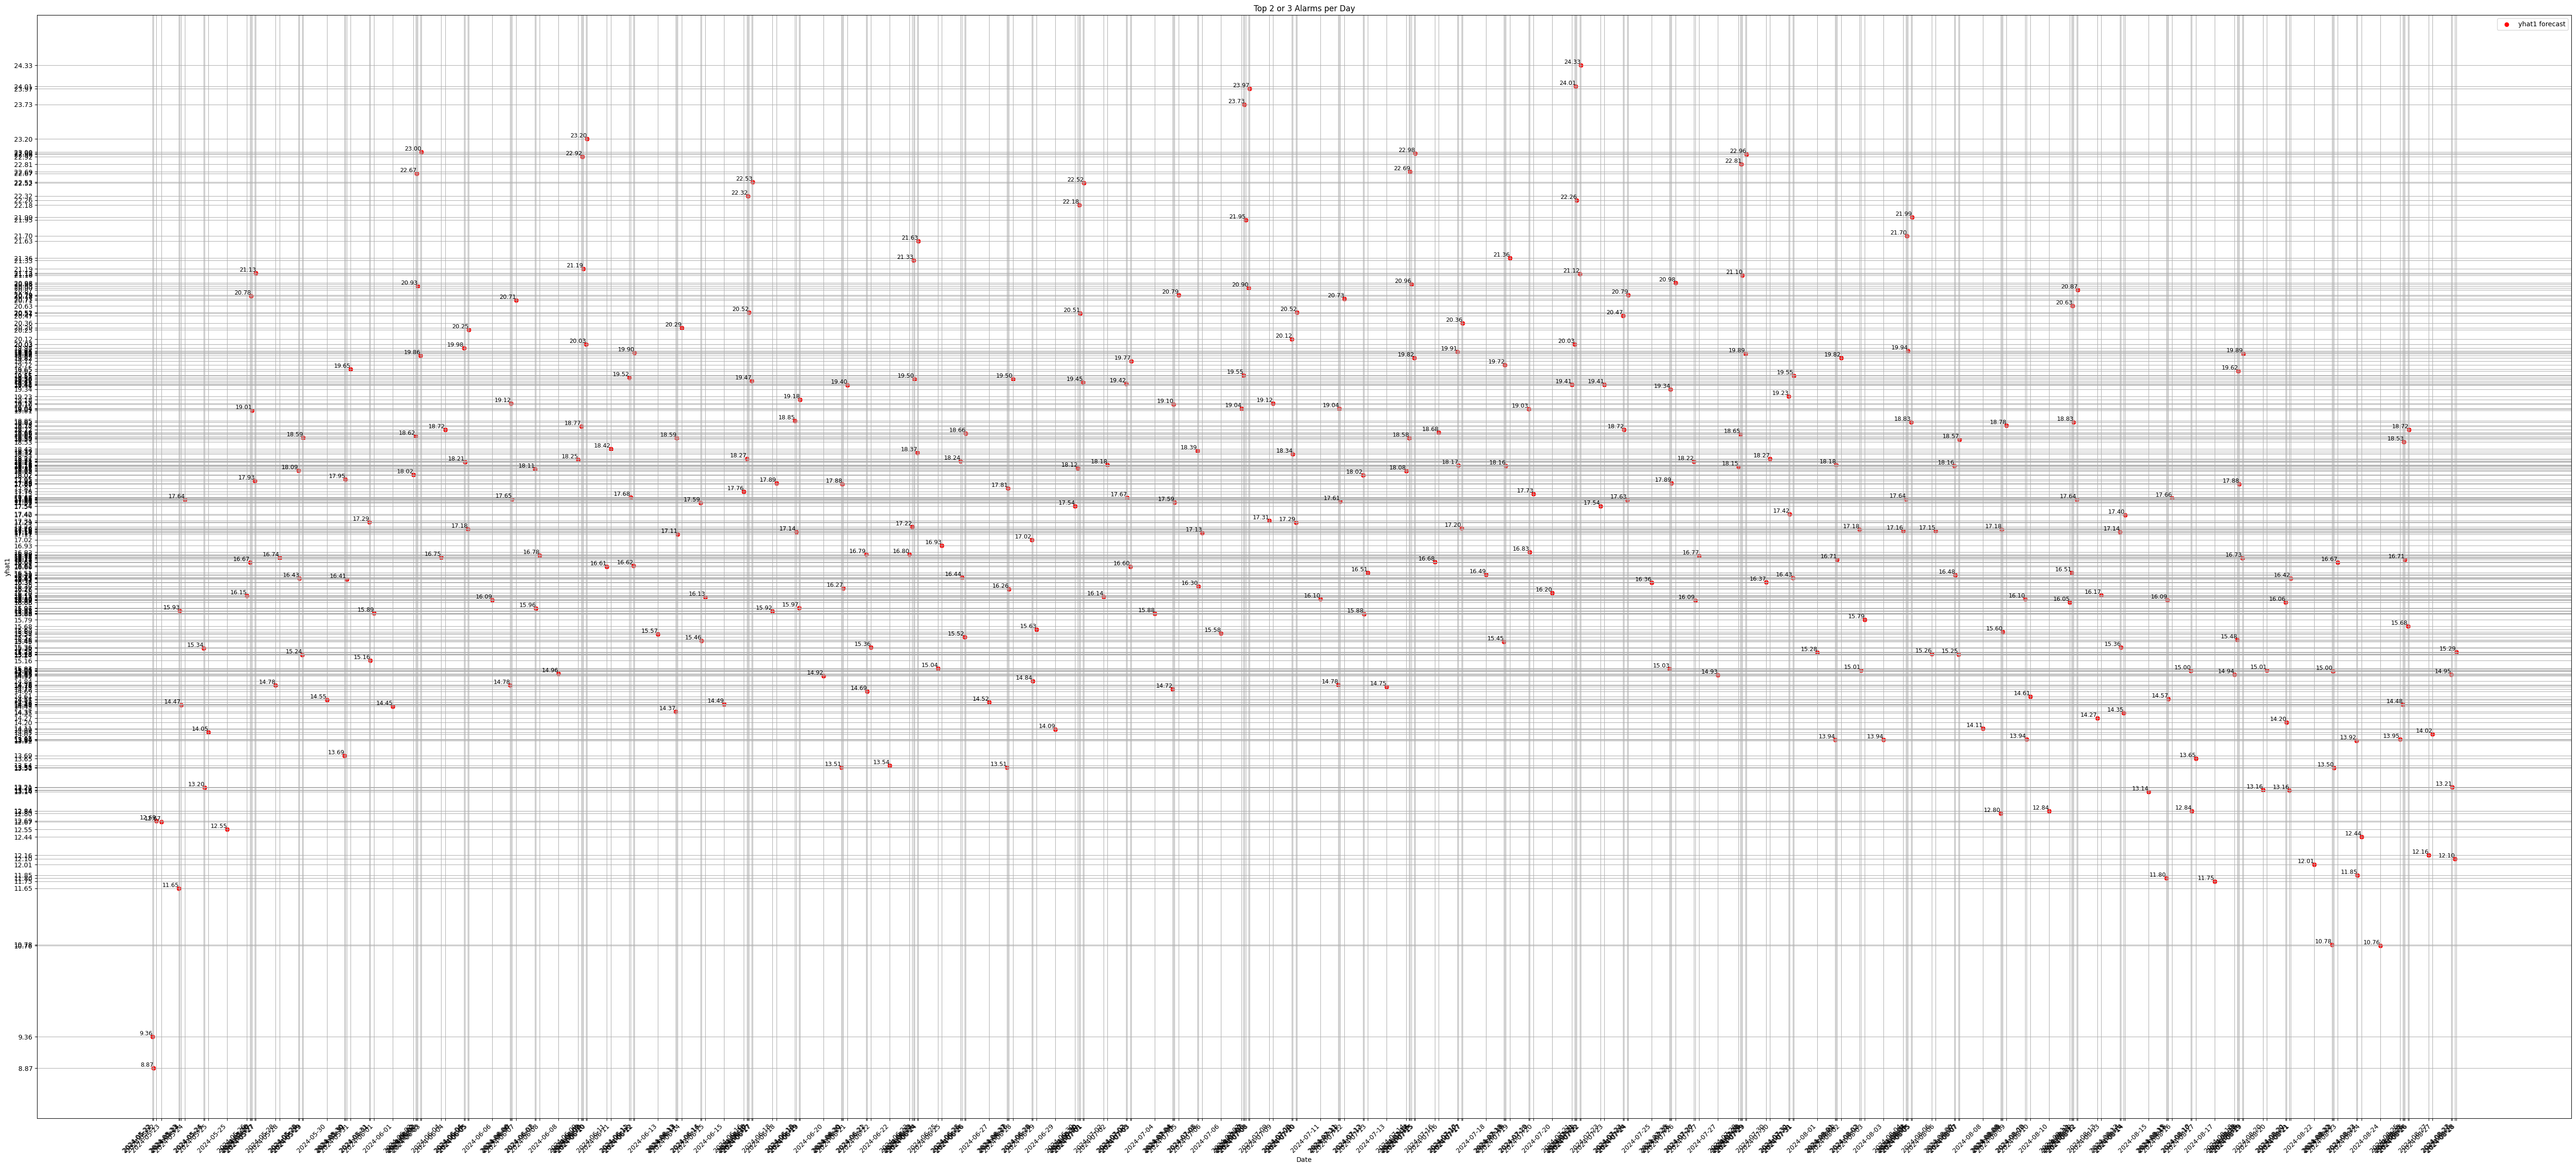

In [ ]:
# prompt: display all values in x axis  and y axis values in the above plot

# Import the necessary library

# Create a new dataframe reaching 7 days into the future for our forecast
df_future = m.make_future_dataframe(PU0146_alarms, n_historic_predictions=True, periods=24*7)

# Predict the future
forecast = m.predict(df_future)

# Limit to 2 or 3 alarms per day
forecast['date'] = forecast['ds'].dt.date  # Extract the date from the datetime
daily_predictions = forecast.groupby('date').apply(lambda x: x.nlargest(3, 'yhat1')).reset_index(drop=True)

# Plot 'yhat1' as dots on top of the existing plot
plt.figure(figsize=(55, 25))  # Create a new figure with adjusted size
plt.scatter(daily_predictions['ds'], daily_predictions['yhat1'], color='red', label='yhat1 forecast')

# Add labels to data points
for i, row in daily_predictions.iterrows():
    plt.text(row['ds'], row['yhat1'], f'{row["yhat1"]:.2f}', fontsize=9, ha='right', va='bottom')

plt.xlabel('Date')
plt.ylabel('yhat1')
plt.title('Top 2 or 3 Alarms per Day')
plt.legend()
plt.grid(True)  # Add grid lines for better readability

# Set x-axis ticks to show all dates
plt.xticks(daily_predictions['ds'], rotation=45, ha='right')

# Set y-axis ticks to show all yhat1 values
plt.yticks(daily_predictions['yhat1'])

plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()  # Display the plot


WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.10/dist-packages/neuralprophet/plot_model_parameters_plotly.py:237: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result


WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.10/dist-packages/neuralprophet/plot_model_parameters_plotly.py:271: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



The behavior of Dateti

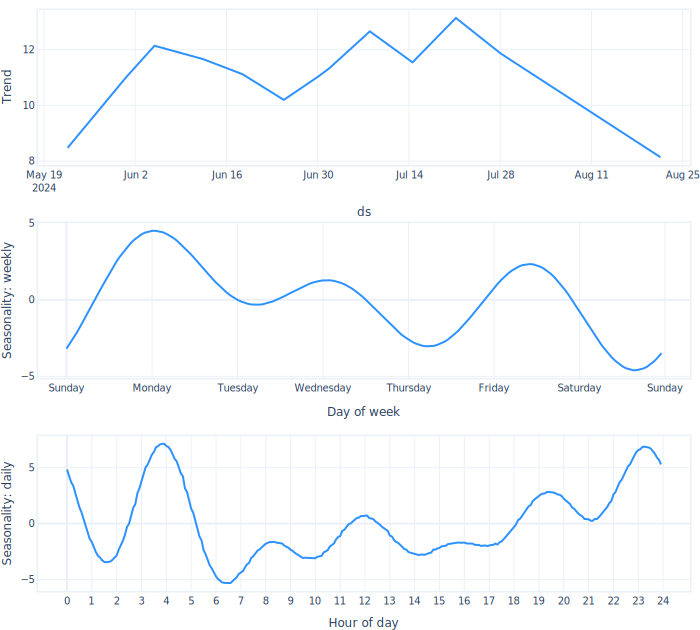

In [ ]:
m.plot_parameters(components=["trend", "seasonality"])

In [ ]:
# prompt: what is the accuracy  of model

print(metrics.tail(1))


     train_loss  reg_loss       MAE      RMSE      Loss  RegLoss  epoch
259    0.049566       0.0  2.868622  3.467798  0.046648      0.0    259


In [ ]:
# prompt: evaluate the model

# Calculate Mean Absolute Error (MAE)
mae = np.mean(np.abs(forecast['y'] - forecast['yhat1']))
print(f'MAE: {mae}')

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(np.mean((forecast['y'] - forecast['yhat1'])**2))
print(f'RMSE: {rmse}')


MAE: 2.966973202995014
RMSE: 3.680369002034306
